In [27]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [28]:
df = pd.read_csv('data3a.csv')

In [29]:
df.head()

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C


In [30]:
df.loc[:,'f']

0     C
1     C
2     C
3     C
4     C
     ..
95    T
96    T
97    T
98    T
99    T
Name: f, Length: 100, dtype: object

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       100 non-null    int64  
 1   x       100 non-null    float64
 2   f       100 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


In [32]:
df.describe(include='all')

,y,x,f
count,100.000000,100.000000,100
unique,NaN,NaN,2
top,NaN,NaN,C
freq,NaN,NaN,50
mean,7.830000,10.089100,NaN
std,2.624881,1.008049,NaN
min,2.000000,7.190000,NaN
25%,6.000000,9.427500,NaN
50%,8.000000,10.155000,NaN
75%,10.000000,10.685000,NaN


In [33]:
print(type(df.loc[50,'x']))
print(type(df.loc[50,'y']))
print(type(df.loc[50,'f']))

<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'str'>


array([<Axes: title={'center': 'x'}, xlabel='[f]'>,
       <Axes: title={'center': 'y'}, xlabel='[f]'>], dtype=object)

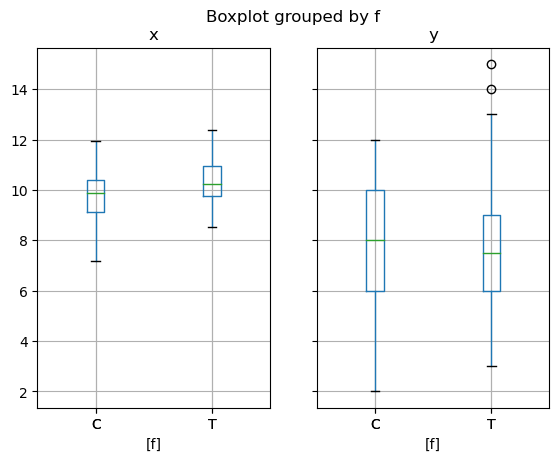

In [34]:
df.boxplot(by='f')

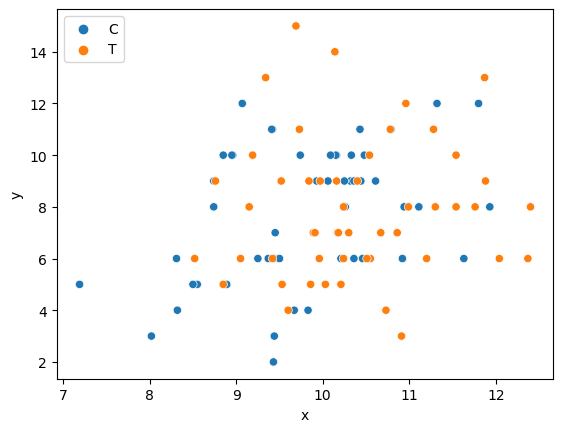

In [35]:
sns.scatterplot(data=df,x='x',y='y',hue='f')
plt.legend(loc='upper left')

In [36]:
x = df['x']
x = sm.add_constant(x)
y = df['y']

model1 = sm.GLM(y, x, family=sm.families.Poisson())
results1 = model1.fit()
print(results1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Sat, 25 Mar 2023   Deviance:                       84.993
Time:                        16:54:52   Pearson chi2:                     83.8
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04414
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2917      0.364      3.552      0.0

In [37]:
x_linear1 = np.linspace(df['x'].min(), df['x'].max(), 30)
x_linear1 = sm.add_constant(x_linear1)
y_linear1 = results1.predict(x_linear1)


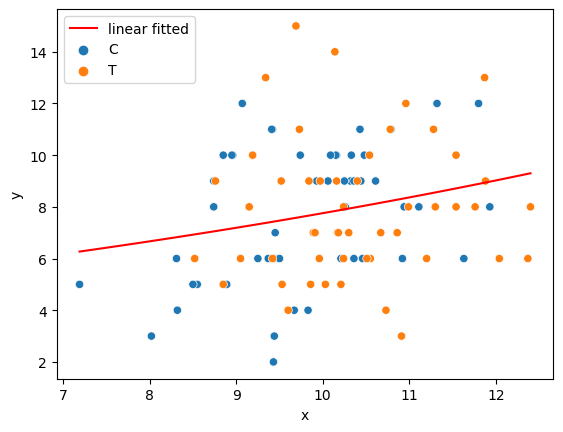

In [38]:
plt.plot(x_linear1[:,1], y_linear1, c='r', label='linear fitted')
sns.scatterplot(data=df,x='x',y='y',hue='f')
plt.legend(loc='upper left')

In [39]:
x_linear11 = np.linspace(df['x'].min(), df['x'].max(), 30)
#x_linear1 = sm.add_constant(x_linear1)
y_linear11 = np.exp(results1.params[0] + results1.params[1] * x_linear11)


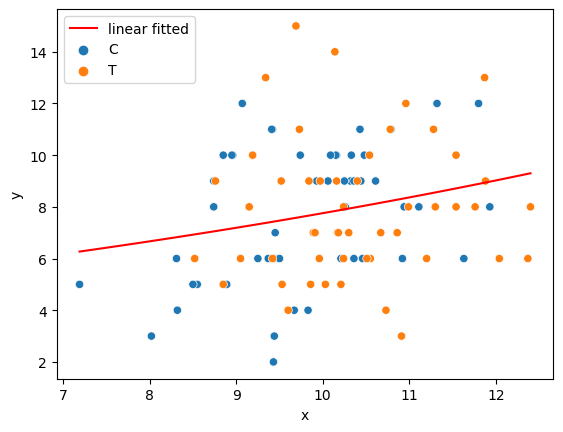

In [40]:
plt.plot(x_linear11, y_linear11, c='r', label='linear fitted')
sns.scatterplot(data=df,x='x',y='y',hue='f')
plt.legend(loc='upper left')

In [41]:
model2 = smf.glm('y ~ f', data= df, family=sm.families.Poisson())
results2 = model2.fit()
print(results2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -237.63
Date:                Sat, 25 Mar 2023   Deviance:                       89.475
Time:                        16:54:52   Pearson chi2:                     87.1
No. Iterations:                     4   Pseudo R-squ. (CS):          0.0003192
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0516      0.051     40.463      0.0

In [42]:
print(results2.params)

Intercept    2.051556
f[T.T]       0.012772
dtype: float64


In [43]:
print(np.exp(results2.params["Intercept"]))
print(np.exp(results2.params["Intercept"] + results2.params['f[T.T]']))

7.780000000000005
7.879999999999995


In [44]:
model3 = smf.glm('y ~ x + f', data = df, family = sm.families.Poisson())
results3 = model3.fit()
print(results3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.29
Date:                Sat, 25 Mar 2023   Deviance:                       84.808
Time:                        16:54:52   Pearson chi2:                     83.8
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04590
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2631      0.370      3.417      0.0

In [45]:
model4 = smf.glm('y ~ x + f', data = df, family = sm.families.Poisson(link = sm.genmod.families.links.identity()))
results4 = model4.fit()
clear_output()

/Users/ts/opt/anaconda3/envs/pythonenvtest1/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The identity link function does not respect the domain of the Poisson family.
  warnings.warn((f"The {type(family.link).__name__} link function "


NameError: name 'clear_output' is not defined

In [ ]:
print(results4.summary())